# Regression
- Kelompok  : MN2023_A2
- Topik     : Linear Regression, Multiple Linear Regression, Polynomial Regression

## Linear Regression
Chapter 9 Slide 15

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [3]:
xtest = [1, 2, 3, 4, 5, 6, 7]
ytest = [0.5, 2.5, 2.0, 4.0, 3.5, 6.0, 5.5]

In [4]:
def squared_sum(x):
    xsquared = np.zeros_like(x)
    xsquaredsum = 0
    for i in range(len(x)):
        xsquared[i] = np.power(x[i], 2)
        xsquaredsum += xsquared[i]
    
    return xsquared, xsquaredsum

def xiyi(x, y):
    if(len(x) == len(y)):
        xy = np.zeros_like(x)
        xysum = 0
        for i in range(len(x)):
            xy[i] = x[i] * y[i] 
            xysum += xy[i]
        return xy, xysum
    return None
    
def sum_avg(x):
    xsum = 0
    for i in range(len(x)):
        xsum += x[i]
    xavg = xsum / len(x)
    return xsum, xavg

def lin_reg(x, y):
    x = np.array(x).astype(float)
    y = np.array(y).astype(float)

    if len(x) == len(y):
        n = len(x)
        xy, xysum = xiyi(x, y)
        xsquared, xsquaredsum =  squared_sum(x)
        xsum, xavg = sum_avg(x)
        ysum, yavg = sum_avg(y)

        a1 = ((n * xysum) - (xsum * ysum))/(n * xsquaredsum - np.power(xsum, 2))
        a0 = yavg - a1 * xavg

        return a1, a0 
    
    return None

def lin_reg_error(x, y, a1, a0):
    x = np.array(x).astype(float)
    y = np.array(y).astype(float)
    if len(x) == len(y):
        n = len(x)
        e = np.zeros_like(x)
        fx = lambda coef, intercept, xi: (coef * xi) + intercept
        for i in range (n):
            e[i] = (y[i] - fx(a1, a0, x[i]))
        sr, srsum = squared_sum(e)
        syx = np.power((srsum / (n - 2)), .5)
        return syx

In [5]:
# Plotting Function

def lin_reg_scatter(x_given, y_given, a1, a0, x_start=0, x_stop=100, x_step = 0.1):

    fx = lambda xi : a1 * xi + a0 
    x_values = np.arange(x_start, x_stop, x_step)
    y_pred = fx(x_values)

    plt.plot(x_values, y_pred, label=f"LinReg fx = {a1}x + {a0}")
    plt.scatter(x_given, y_given, label="dataset")

    plt.legend()
    plt.show()

def lin_reg_scatter_sns(x_given, y_given, a1, a0, x_start=0, x_stop=100, x_step = 0.1):

    fx = lambda xi : a1 * xi + a0
    x_values = np.arange(x_start, x_stop, x_step)
    y_values = fx(x_values)
    dataset = pd.DataFrame({'x':x_given, 'y':y_given})


    sns.scatterplot(data=dataset, x ='x', y ='y', color='orange', label='Data points')
    sns.lineplot(x=x_values, y=y_values, color='blue', label=f"LinReg fx = {a1}x + {a0}")

    plt.legend()
    plt.show()

In [6]:
# Use case for Lin-Reg

a1test, a0test = lin_reg(xtest, ytest)
syxtest = lin_reg_error(xtest, ytest, a1test, a0test)
print(a1test, a0test)   
print(syxtest)

0.8392857142857143 0.07142857142857117
0.7734431367038469


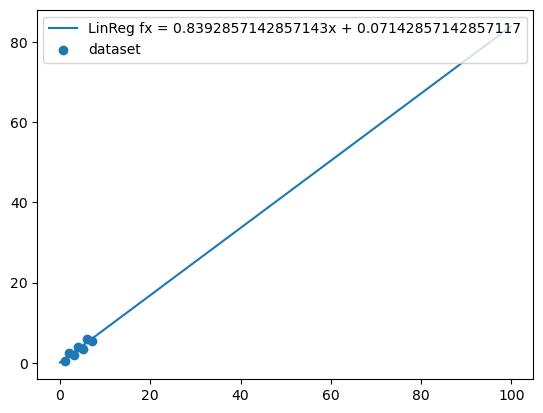

In [7]:
lin_reg_scatter(xtest, ytest, a1test, a0test)

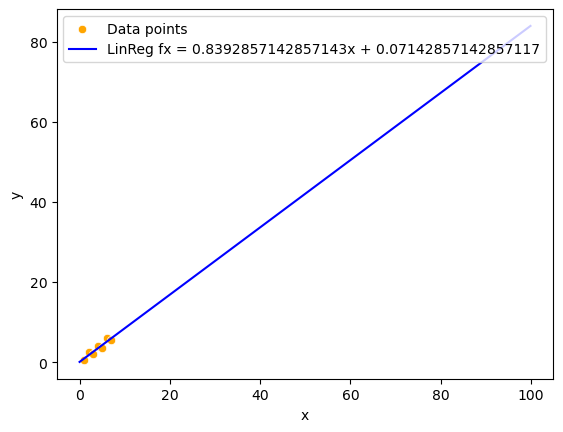

In [8]:
lin_reg_scatter_sns(xtest, ytest, a1test, a0test)

## Multiple Linear Regression
Chapter 9 Slide 25

In [9]:
# Read data from csv

data25 = pd.read_csv("MN23 Multiple Linear Regression Exercise.csv", header=None)
data25x = data25[[0, 1, 2]]
data25y = data25[[3]]

In [10]:
def multiple_lin_reg(x_data, y_data):
    if isinstance(x_data, pd.DataFrame) and isinstance(y_data, pd.DataFrame):
        x = x_data.values
        y = y_data.values
    x = np.array(x).astype(float)
    y = np.array(y).astype(float)
    
    x_trans = x.T
    xtx = x_trans.dot(x)
    xty = x_trans.dot(y)
    xtx_inv = np.linalg.inv(xtx)

    b = xtx_inv.dot(xty)
    return b

In [11]:
b0, b1, b2 = multiple_lin_reg(data25x, data25y)
print(b0, b1, b2)

[2.26379143] [2.74426964] [0.01252781]


In [63]:
def plot_3d_reg(x0_test, x1_test, x2_test, y_test, b0, b1, b2, x_start=0, x_end=100, x_step=0.1, gif=False):
    fx = lambda x1, x2: b0 + (b1 * x1) + (b2 * x2) 
    x = np.arange(x_start, x_end, x_step)
    y = np.arange(x_start, x_end, x_step)
    x, y = np.meshgrid(x, y)
    z = fx(x, y)

    fig = plt.figure()
    axis = fig.add_subplot(111, projection='3d')
    surface = axis.plot_surface(x, y, z, alpha=.5)
    axis.scatter(x1_test, x2_test, y_test)
    
    if(gif):
        for ii in np.arange(0, 360, 1):
            axis.view_init(elev=32, azim=ii)
            fig.savefig('gif_image%d.png' % ii)

    plt.show()

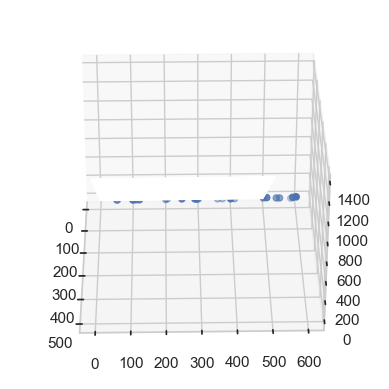

In [62]:
plot_3d_reg(data25x[0], data25x[1], data25x[2], data25y, b0, b1, b2, 0, 500, 1)

## Polynomial Regression
Chapter 9 Slide 29

In [12]:
def cubic_sum(x):
    xcubic = np.zeros_like(x)
    xcubicsum = 0
    for i in range(len(x)):
        xcubic[i] = np.power(x[i], 3)
        xcubicsum += xcubic[i]
    return xcubic, xcubicsum

def power4_sum(x):
    xpower4 = np.zeros_like(x)
    xpower4sum = 0
    for i in range(len(x)):
        xpower4[i] = np.power(x[i], 4)
        xpower4sum += xpower4[i]
    return xpower4, xpower4sum

def inverse(x):
    A = np.copy(x)
    n = len(A)
    B = np.eye(n).astype(float)

    # Gauss-Jordan
    for i in range(n):
        # make row has leading 1 on A-side and B-side
        if A[i, i] != 1:
            factor = 1 / A[i, i]
            A[i, :] *= factor
            B[i, :] *= factor
        for j in range(n):
            # do operation for all the rows except i-th row on A-side and B-side
            if j != i:
                # find multiplier of current row by dividing it with i-th row
                multiplier = -1 * A[j, i] / A[i, i]
                # update all values of j-th row using all values of i-th row
                A[j, :] += multiplier * A[i, :]
                B[j, :] += multiplier * B[i, :]
            else:
                continue
    
    return B

In [ ]:
# def poly_reg(x, y):
#     if isinstance(x, pd.DataFrame) and isinstance(y, pd.DataFrame):
#         x = x.values
#         y = y.values

#     n = len(x)
#     x = np.array(x).astype(float)
#     y = np.array(y).astype(float)    
#     xy, xysum = xiyi(x, y)

#     if xy is None or xysum is None:
#         return None  # Return None if lengths are not equal
    
#     xsum, xavg = sum_avg(x)
#     ysum, yavg = sum_avg(y)
#     xsquared, xsquaredsum = squared_sum(x)

#     xsquaredy, xsquaredysum = xiyi(xsquared, y)

#     xcubic, xcubicsum = cubic_sum(x)
#     xpower4, xpower4sum = power4_sum(x)

#     xysum, xyavg = sum_avg(xy)
#     xsquaredysum, xsquaredyavg = sum_avg(xsquaredy)

#     xmatrix = np.array([[n, xsum, xsquaredsum],
#                         [xsum, xsquaredsum, xcubicsum],
#                         [xsquaredsum, xcubicsum, xpower4sum]])
    
#     ymatrix = np.array([ysum, xysum, xsquaredysum])

#     # xmatrix * a = ymatrix
#     # a = (xmatrix)^-1 * ymatrix

#     a = np.dot(np.linalg.inv(xmatrix), ymatrix)
#     return a

In [1]:
def pr(x,y,plot,poly=2):
    X = np.copy(x)
    Y = np.copy(y)
    sum_x = sum(X)
    sum_y = sum(Y)
    n = poly+1

    A = np.zeros((n,n))
    B = np.zeros(n)

    temp = []
    low = 0
    k = n
    # calculate values of temp
    for i in range(n):
        for j in range(low, k):
            if i==0 and j==0: temp.append(len(X))
            else:
                temp.append(sum(X[:]**j))
        low += 1
        k += 1
    
    # assign temp values to A 
    for i in range(len(temp)):
        if i<n:
            A[0,i]=temp[i]
        if i>=n:
            A[int(i/n),i%n]=temp[i]
    
    # calculate values of B
    for i in range(n):
        B[i] = sum(x[:]**i*y[:])

    # Ax = B -> x = A^-1 @ B
    a = inverse(A) @ B

    # output
    y_out = "y = "
    for i in range(len(a)):
        if i == 0:
            y_out += str(a[i]) + " + "
        elif i > 0 and i < (len(a) - 1):
            y_out += str(a[i]) + "x^" + str(i) + " + "
        elif i == len(a) - 1:
            y_out += str(a[i]) + "x^" + str(i)

    # error
    error = 0
    for i in range(len(X)):
        sum1 = 0
        for j in range(n):
            sum1 += a[j]*X[i]**j
        sum2 = Y[i] - sum1
        error += sum2 ** 2
    variance = error
    std_dev = np.sqrt(variance/(len(X)-n))

    # plotting
    if plot:
        plt.title(y_out)
        plot_y = []
        for i in range(len(X)):
            sum1 = 0
            for j in range(n):
                sum1 += a[j]*X[i]**j
            plot_y.append(sum1)
        plt.scatter(X,Y)
        plt.plot(X,plot_y)
        plt.show()
    
    return y_out, variance, std_dev

In [13]:
xmulregtest = np.array([0, 1, 2, 3, 4, 5])
ymulregtest = np.array([2.1, 7.7, 13.6, 27.2, 40.9, 61.1])
amulregtest = poly_reg(xmulregtest, ymulregtest)

print(amulregtest)

[array([  2.47857143,  -1.37142857,  -8.69285714, -23.75      ,
        -35.5       , -41.16428571])
 array([ 2.35928571,  6.92428571, 14.84214286, 28.87928571, 33.61857143,
        19.81642857])
 array([ 1.86071429,  1.03571429, -0.325     , -2.51071429, -2.52142857,
         1.86071429])                                                   ]


C:\Users\RAYHAN EGAR\AppData\Local\Temp\ipykernel_28496\817148192.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ymatrix = np.array([ysum, xysum, xsquaredysum])
